## Chapter 5
# Geometric Signal Theory

This chapter basically serves as an introduction to some relevant concepts in linear algebra.

I have recently created a set of notebooks covering all of the material in the linear algebra textbook [Coding the Matrix](https://www.amazon.com/Coding-Matrix-Algebra-Applications-Computer/dp/0615880991/ref=sr_1_1?ie=UTF8&qid=1526336193&sr=8-1&keywords=coding+the+matrix), which can be found [here](https://nbviewer.jupyter.org/github/khiner/notebooks/tree/master/coding_the_matrix/), so I do not have any supplementary material for this chapter other than problem solutions.

## Signal Projection Problems

**1. Find the components (sample values) of the sinusoids $x_k(n) \triangleq e^{j\omega_knT}$, where $\omega_kT = 2\pi k/N$, and $n = 0,1,...,N-1$, $k = 0,1,...,N-1$, and the dimension of the signal space is $N = 4$.**

$x_0 = [1,1,1,1]\\
x_1 = [1,j,-1,-j]\\
x_2 = [1,-1,1,-1]\\
x_3 = [1,-j,-1,j]$

In [28]:
# verify:
%precision 3
np.set_printoptions(suppress=True)

N = 4
xs = [np.exp(1j * 2 * np.pi * k * np.arange(N) / N) for k in np.arange(N)]
xs = np.array(xs)
print(xs)    

[[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  0.+1.j -1.+0.j -0.-1.j]
 [ 1.+0.j -1.+0.j  1.-0.j -1.+0.j]
 [ 1.+0.j -0.-1.j -1.+0.j  0.+1.j]]


**2. For each $k$, and with $N = 4$, plot (on the unit circle in the complex plane) the _generators_**

$W_N^k \triangleq e^{j2\pi\frac{k}{N}}$, $k = 0,1,...,N-1$,

**of the sampled sinusoids $x_k(n) = \left[W_N^k\right]^n$ defined in the previous problem. From looking at this diagram, find**

$\sum_\limits{k=0}^\limits{N-1}{W_N^k}$.

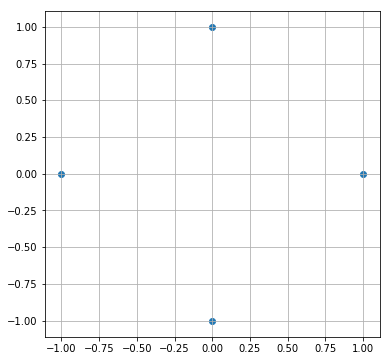

In [41]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

N = 4
W = np.exp(1j * 2 * np.pi * np.arange(N) / N)
plt.figure(figsize=(6,6))
plt.grid(True)
_ = plt.scatter(W.real, W.imag)

It is clear from looking at this chart that $\sum_\limits{k=0}^\limits{N-1}{W_N^k} = 0$.

**3. Verify the _orthogonality_ of the set of signal vectors $\{x_k\}$ defined in the previous problem by computing the following _inner products_: $\langle x_0, x_1 \rangle, \langle x_0, x_2 \rangle,\langle x_0, x_3 \rangle,\langle x_1, x_2 \rangle,\langle x_1, x_3 \rangle,\langle x_2, x_3 \rangle$. Why do we need no more combinations than these six?**

$\begin{array}{llll}
\langle x_0, x_1 \rangle &= 1 \cdot \overline{1} + 1 \cdot \overline{j} + 1 \cdot \overline{-1} + 1 \cdot \overline{-j} &= 1 -j -1 + j &= 0\\
\langle x_0, x_2 \rangle &= 1 \cdot \overline{1} + 1 \cdot \overline{-1} + 1 \cdot \overline{1} + 1 \cdot \overline{-1} &= 1 -1 + 1 -1 &= 0\\
\langle x_0, x_3 \rangle &= 1 \cdot \overline{1} + 1 \cdot \overline{-j} + 1 \cdot \overline{-1} + 1 \cdot \overline{j} &= 1 + j -1- j &= 0\\
\langle x_1, x_2 \rangle &= 1 \cdot \overline{1} + j \cdot \overline{-1} + -1 \cdot \overline{1} + -j \cdot \overline{-1} &= 1 -j -1+ j &= 0\\
\langle x_1, x_3 \rangle &= 1 \cdot \overline{1} + j \cdot \overline{-j} + -1 \cdot \overline{-1} + -j \cdot \overline{j} &= 1 -1 + 1 -1 &= 0\\
\langle x_2, x_3 \rangle &= 1 \cdot \overline{1} + -1\cdot \overline{-j} + 1 \cdot  \overline{-1} + -1 \cdot \overline{j} &= 1 -j -1 +j &= 0\\
\end{array}$

We only need these six combinations because of the commutative property of the inner-product of complex vectors (which in turn follows from the commutative property of complex numbers themselves).

That is, $\langle x_0, x_1 \rangle = \langle x_1, x_0 \rangle, \forall x_i \in \mathbb{C}$.

**4. Show that each $x_k(n)$ has _norm_, or "length", equal to** $\|x_k\| = \sqrt{\langle x_k,x_k\rangle}=2$.

$\begin{array}{llll}
\|x_0\| \triangleq \sqrt{\langle x_0, x_0 \rangle} = \sqrt{1\cdot \overline{1} + 1 \cdot \overline{1 } + 1 \cdot \overline{1 } + 1\cdot \overline{1}} &= 2\\
\|x_1\| \triangleq \sqrt{\langle x_1, x_1 \rangle} = \sqrt{1\cdot \overline{1} + j \cdot \overline{j } + -1\cdot \overline{-1} +-j\cdot \overline{-j}} &= 2\\
\|x_2\| \triangleq \sqrt{\langle x_2, x_2 \rangle} = \sqrt{1\cdot \overline{1} + -1\cdot \overline{-1} + 1 \cdot \overline{1 } +-1\cdot \overline{-1}} &= 2\\
\|x_3\| \triangleq \sqrt{\langle x_3, x_3 \rangle} = \sqrt{1\cdot \overline{1} + -j\cdot \overline{-j} + -1\cdot \overline{-1} + j\cdot \overline{j}} &= 2\\
\end{array}$

**5. Find the orthogonal projection of the signal $y(n) = n$ (i.e., $y = [0,1,2,3]$), onto each of the signals $x_k$, $k = 0,1,2,3$, from the previous problem.**

$\begin{array}{lll}
y_{x_0}(n) &\triangleq \frac{\langle y, x_0 \rangle}{\|x_0\|^2}x_0(n) &= \frac{6}{4}x_0(n) &= [1.5, 1.5, 1.5, 1.5]\\
y_{x_1}(n) &\triangleq \frac{\langle y, x_1 \rangle}{\|x_1\|^2}x_1(n) &= \frac{-2 + 2j}{4}x_1(n) &= [-0.5 + 0.5j, -0.5 - 0.5j, 0.5 - 0.5j, 0.5 + 0.5j]\\
y_{x_2}(n) &\triangleq \frac{\langle y, x_2 \rangle}{\|x_2\|^2}x_2(n) &= \frac{-2}{4}x_2(n) &= [-0.5, 0.5, -0.5, 0.5]\\
y_{x_3}(n) &\triangleq \frac{\langle y, x_3 \rangle}{\|x_3\|^2}x_3(n) &= \frac{-2 - 2j}{4}x_3(n) &= [-0.5 - 0.5j, -0.5 + 0.5j, 0.5 + 0.5j, 0.5 - 0.5j]\\
\end{array}$

In [39]:
# verify:
N = 4
for x_i in xs:
    inner_product = np.sum(np.arange(N) * np.conj(x_i))
    print('Inner product:', inner_product)
    print('y: ', (inner_product / 4) * x_i)

Inner product: (6+0j)
y:  [ 1.5+0.j  1.5+0.j  1.5+0.j  1.5+0.j]
Inner product: (-2+2j)
y:  [-0.5+0.5j -0.5-0.5j  0.5-0.5j  0.5+0.5j]
Inner product: (-2-7.34788079488e-16j)
y:  [-0.5-0.j  0.5+0.j -0.5-0.j  0.5+0.j]
Inner product: (-2-2j)
y:  [-0.5-0.5j -0.5+0.5j  0.5+0.5j  0.5-0.5j]


**6. Add the orthogonal projections together from the previous problem. That is, find the sum**

$s(n) \triangleq y_{x_0}(n) + y_{x_1}(n) + y_{x_2}(n) + y_{x_3}(n)$.

**Explain the significance of the above operations in the spectrum analysis context. What are we doint from a geometric perspective?**

$\begin{align}
s(n) &\triangleq y_{x_0}(n) + y_{x_1}(n) + y_{x_2}(n) + y_{x_3}(n)\\
&= [0,1,2,3]
\end{align}$

In [37]:
# verify:
s = np.zeros(N, dtype=complex)
for x_i in xs:
    norm = np.sum(np.arange(N) * np.conj(x_i))
    s += (norm / 4) * x_i
print(s)

[ 0.-0.j  1.-0.j  2.+0.j  3.+0.j]


The significance of the above operations is that we have reconstructed the signal $y(n)$ by summing its $N$ projections onto the orthogonal basis set $x(n)$.

From a spectrum analysis context, since we projected onto a set of sampled complex sinusoids $x(n)$, we have reconstructed the signal from a _weighted sum of sampled complex sinusoids_, which is exactly what the IDFT operation does!

**7. Find the Discrete Fourier Transform (DFT) of the sequence $y = [0,1,2,3]$.**

$\begin{align}
Y(\omega_k) &\triangleq \sum_\limits{n=0}^\limits{N-1}{y(n)e^{-j2\pi kn/N}}, k=0,1,2,3\\
&= \sum_\limits{n=0}^\limits{N-1}{y(n)\overline{x_k(n)}}, k=0,1,2,3\\
\end{align}$

$\begin{align}
Y(\omega_0) &= \sum_\limits{n=0}^\limits{N-1}{y(n)\overline{x_0(n)}}\\
&= 0 + 1 + 2 + 3 = 6\space\text{(dc offset)}\\
Y(\omega_1) &= \sum_\limits{n=0}^\limits{N-1}{y(n)\overline{x_1(n)}}\\
&= 0 \cdot \overline{1} + 1 \cdot \overline{j} + 2 \cdot \overline{-1} + 3 \cdot \overline{-j}\\
&= -2 + 2j\\
Y(\omega_2) &= 0 \cdot \overline{1} + 1 \cdot \overline{-1} + 2 \cdot \overline{1} + 3 \cdot \overline{-1}\\
&= -2\\
Y(\omega_3) &= 0 \cdot \overline{1} + 1 \cdot \overline{-j} + 2 \cdot \overline{-1} + 3 \cdot \overline{j}\\
&= -2 -2j
\end{align}$

(These results agree with the inner products computed in problem 5 above.)

**8. Show**

$\sum_\limits{n=0}^\limits{N-1}{e^{j2\pi kn/N}} = \begin{cases}\begin{array}{ll}
N, &k = 0\\
0, &k \neq 0\\
\end{array}\end{cases}$

**That is, show that every complex sinusoid with nonzero frequency  $\omega_kT = 2\pi k/N$ is zero mean.**

We showed this informally in problem 2 above, for the case where $N = 4$, with a plot in the complex plane.

Here is another example with $N \gg 4$ and $N$ is _odd_ for contrast:

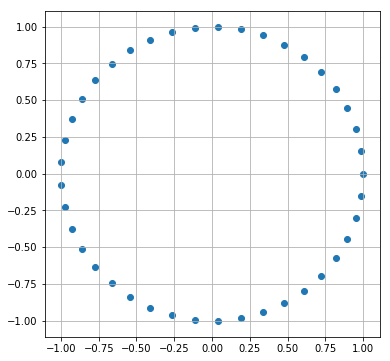

In [58]:
N = 41
W = np.exp(1j * 2 * np.pi * np.arange(N) / N)
plt.figure(figsize=(6,6))
plt.grid(True)
_ = plt.scatter(W.real, W.imag)

We can experimentally verify that the sum of the above plotted points is equal to $0$:

In [59]:
W.sum()

(-1.1102230246251565e-16+3.3306690738754696e-16j)

(This is $0$ with computational rounding errors.)

$\begin{align}
\sum_\limits{n=0}^\limits{N-1}{e^{j2\pi kn/N}} &= \sum_\limits{n=0}^\limits{N-1}{\cos(2\pi kn/N) + j\sin(2\pi kn/N)}\\
&= \sum_\limits{n=0}^\limits{N-1}{\cos(2\pi kn/N)} + \sum_\limits{n=0}^\limits{N-1}{j\sin(2\pi kn/N)}\\
&= \sum_\limits{n=0}^\limits{N-1}{\cos(2\pi kn/N)} + j\sum_\limits{n=0}^\limits{N-1}{\sin(2\pi kn/N)}\\
\end{align}$

We could go on to show that the left side of this equation ($\cos(\cdot)$) can be broken up into its "right" ($-\frac{\pi}{2} < \theta \leq \frac{\pi}{2}$) and "left" ($\frac{\pi}{2} < \theta \leq \frac{3\pi}{2}$) components, and show they cancel out. We could similarly show this for the $\sin(\cdot)$ term, splitting into "upper" and "lower" cancelling components.

**9. Define**

$
c_k(n) = \cos(\omega_kn)\\
s_k(n) = \sin(\omega_kn)\\
e_k(n) = e^{j\omega_kn}\\
$

**where $\omega_kT \triangleq 2\pi k/N$, and integers $n$ and $k$ range from $0$ to $N - 1$. Show that, given $e_k \perp e_l$ for all $k \neq l$, we have**

$\begin{array}{lcr}
c_k \perp c_l, & k \neq l, & k \neq N - l\\
s_k \perp s_l, & k \neq l, & k \neq N - l\\
s_k \perp c_l, & k \neq l, & k \neq N - l.\\
\end{array}$


$\begin{align}
e_k \perp e_l &\implies e^{j\omega_kn} \perp e^{j\omega_ln}\\
&\implies \langle e^{j\omega_kn}, e^{j\omega_ln} \rangle = 0\\
&\implies \sum_\limits{n=0}^\limits{N-1}{e^{j\omega_kn}\overline{e^{j\omega_ln}}} = 0\\
&\implies \sum_\limits{n=0}^\limits{N-1}{(\cos(\omega_kn) + j\sin(\omega_kn))\overline{(\cos(\omega_ln) + j\sin(\omega_ln))}} = 0\\
&\implies \sum_\limits{n=0}^\limits{N-1}{(\cos(\omega_kn) + j\sin(\omega_kn))(\cos(\omega_ln) -j\sin(\omega_ln))} = 0\\
&\implies \sum_\limits{n=0}^\limits{N-1}{(c_k(n) + js_k(n))(c_l(n) -js_l(n))} = 0\\
&\implies \sum_\limits{n=0}^\limits{N-1}{\left[c_k(n)c_l(n) + s_k(n)s_l(n) + js_k(n)c_l(n) - jc_k(n)s_l(n)\right]} = 0\\
&\implies \sum_\limits{n=0}^\limits{N-1}{\left[c_k(n)c_l(n) + s_k(n)s_l(n)\right]} + j\sum_\limits{n=0}^\limits{N-1}{\left[s_k(n)c_l(n) - c_k(n)s_l(n)\right]} = 0\\
\end{align}$

Since both the real and complex parts of this expression must equal $0$, we have two corallaries:

$\sum_\limits{n=0}^\limits{N-1}{c_k(n)c_l(n)} + \sum_\limits{0}^\limits{N-1}{s_k(n)s_l(n)} = 0$, and

$\sum_\limits{n=0}^\limits{N-1}{s_k(n)c_l(n)} -\sum_\limits{0}^\limits{N-1}{c_k(n)s_l(n)} = 0$.

The first expression will equal $0$ if either the left term equals the negative of the right term, or if both terms equal $0$.

The second expression will equal $0$ if either the left term equals the right term, or if both terms equal $0$.

If we set $k = N - l$,

$\begin{align}
c_k(n)c_l(n) + s_k(n)s_l(n) &= \cos(2\pi (N - l)n/N)\cos(2\pi ln/N) + \sin(2\pi (N - l)n/N)\sin(2\pi ln/N)\\
&= \cos(2\pi n - 2\pi ln/N)\cos(2\pi ln/N) + \sin(2\pi n - 2\pi ln/N)\sin(2\pi ln/N)\\
&= \cos(-2\pi ln/N)\cos(2\pi ln/N) + \sin(-2\pi ln/N)\sin(2\pi ln/N)\\
&= \cos(2\pi ln/N)^2 - \sin(2\pi ln/N)^2\space\space\text{(using $\cos(\theta) = -\cos(\theta)$ and $\sin(-\theta) = -\sin(\theta)$)}\\
&= c_l(n)^2 - s_l(n)^2\\
\end{align}$

Thus, when $k = N - 1$, $c_k(n) = c_l(n)$ and $s_k(n) = -s_l(n)$, and since

$c_l(n)^2 - s_l(n)^2 = 0$ (shown above), and $c_l(n)^2 + s_l(n)^2 = 1$ (from the Pythagorean theorem), we have

$c_l(n)^2 - (1 - c_l(n)^2) = 0 \implies c_l(n) = c_k(n) = \sqrt{\frac{1}{2}} \neq 0$.

Finally, this shows that when $k = N - 1$, $c_k\perp c_l$ does not hold.  We can similarly show that $s_k \perp s_l$ also does not hold in this case.

**10. Show that the restrictions $k \neq l$, and $k \neq N - l$ in the previous problem can be removed in the case of $s_k \perp c_l$.**

In problem 9 above, we derived

$\sum_\limits{n=0}^\limits{N-1}{s_k(n)c_l(n)} -\sum_\limits{0}^\limits{N-1}{c_k(n)s_l(n)} = 0$.

For the case when $k = l$, this reduces to 

$\begin{align}
\sum_\limits{n=0}^\limits{N-1}{s_l(n)c_l(n)} -\sum_\limits{0}^\limits{N-1}{c_l(n)s_l(n)} &= \sum_\limits{n=0}^\limits{N-1}{\frac{1}{2}\sin(2\omega_k n)} - \sum_\limits{n=0}^\limits{N-1}{\frac{1}{2}\sin(2\omega_k n)}\\
\end{align}$.

Each term is a sum over a single sinusoid over a whole number of periods, and will thus equal $0$.

For the case when $k = N - l$,

$\begin{align}
s_k(n)c_l(n) -c_k(n)s_l(n) &= \sin(2\pi (N - l)n/N)\cos(2\pi ln/N) - \cos(2\pi (N - l)n/N)\sin(2\pi ln/N)\\
&= \sin(2\pi n - 2\pi ln/N)\cos(2\pi ln/N) + \cos(2\pi n - 2\pi ln/N)\sin(2\pi ln/N)\\
&= \sin(-2\pi ln/N)\cos(2\pi ln/N) + \cos(-2\pi ln/N)\sin(2\pi ln/N)\\
&= -\sin(2\pi ln/N)\cos(2\pi ln/N) - \cos(2\pi ln/N)\sin(2\pi ln/N)\space\space\text{(using $\cos(\theta) = -\cos(\theta)$ and $\sin(-\theta) = -\sin(\theta)$)}\\
&= -s_l(n)c_l(n) - c_l(n)s_l(n)\\
\end{align}$.

This is in the same form as the case when $k = l$, so we can make the same argument as above to show that each term sums to $0$.